In [16]:

#TIME SERIES FORECASTING -- RAHUl AGGARWAL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

data = pd.read_csv('AirPassengers.csv')

In [4]:

data



Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [5]:


print ('\n Data Types:')
print (data.dtypes)



 Data Types:
Month          object
#Passengers     int64
dtype: object


In [6]:
data

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [7]:
import datetime

In [8]:

# The data contains a particular month and number of passengers travelling in that month. 
#In order to read the data as a time series, we have to pass special arguments to the read_csv command:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

data.head()

## NOTE: You can run remaining codes in this article as well, using this live coding window.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [12]:

data


#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

In [14]:

moving_avg = pd.Series(data["#Passengers"]).rolling(window=12).mean()
moving_avg

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: #Passengers, Length: 144, dtype: float64

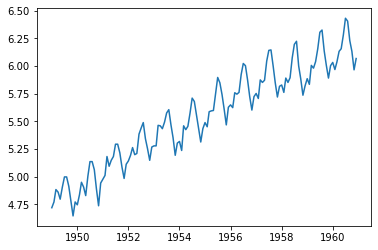

In [17]:
ts=data

ts_log = np.log(ts)
plt.plot(ts_log)

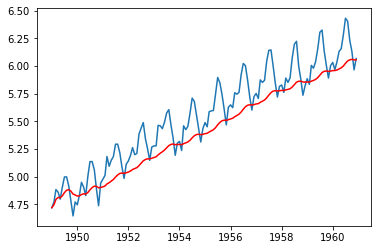

In [18]:

expwighted_avg = ts_log.ewm(halflife=12).mean()


plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

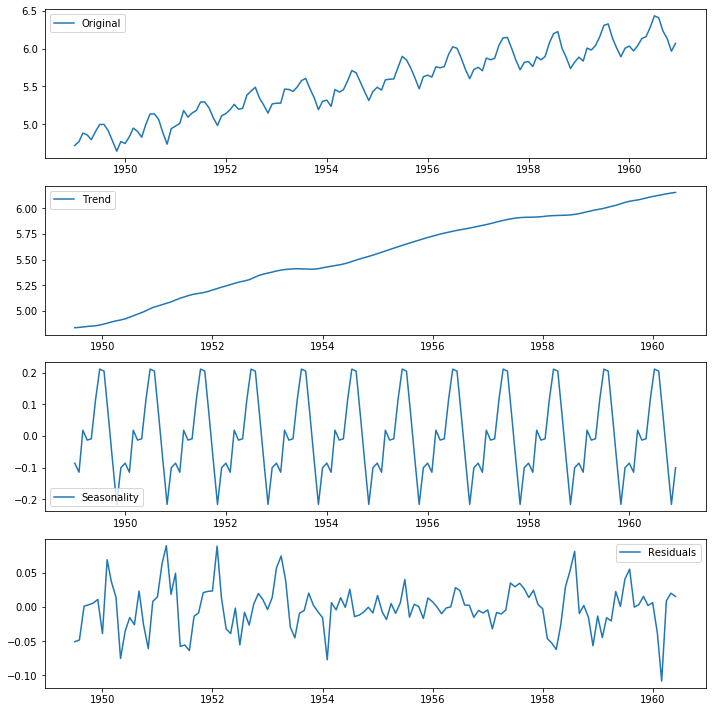

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(data["#Passengers"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


yt   =  data["#Passengers"]
yt-1 = data["#Passengers"].shift(1)
yt-2 = data["#Passengers"].shift(2)


#yt=yt-1 * b1 + yt-2 * b2



#DIFFERENCING
yt1 = data["#Passengers"] - data["#Passengers"].shift(1)  ---ERROR 
yt2 = data["#Passengers"] - data["#Passengers"].shift(2)  ---ERROR 
yt=yt1 * b1 + yt2 * b2


#MA
yt1 = ma(data["#Passengers"],window=2)
yt=yt1 * b1 




window --- 2

2   na      na  
3   na       na
4   3.4     .6
5   4.5     .5
6   4.2     1.8
?

In [21]:
ts_log

#Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1960-08-01     6.406880
1960-09-01     6.230481
1960-10-01     6.133398
1960-11-01     5.966147
1960-12-01     6.068426

[144 rows x 1 columns]

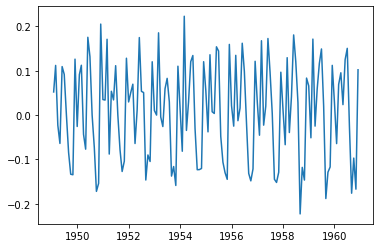

In [23]:
ts_log_diff = ts_log["#Passengers"] - ts_log["#Passengers"].shift()

#shift of 1

plt.plot(ts_log_diff)

??datetime

121  = 129 * .5 + 132 *.2  +118 *0 + 112*0  ==MA model [lag=2]  == 119
error =121=119

RMSE
---ARMA (lag1,lag2)


121  = 129 * .5 + 132 *.2  +118 *0.002 + 112*0.......+  ==AR model [lag=300]  == 119.999999

error--reduce  ----

In [24]:
data

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

In [25]:
data.index





DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [26]:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [27]:
#1. Specific the index as a string constant:
ts['1949-01-01']

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [28]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [29]:
ts['1949']


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

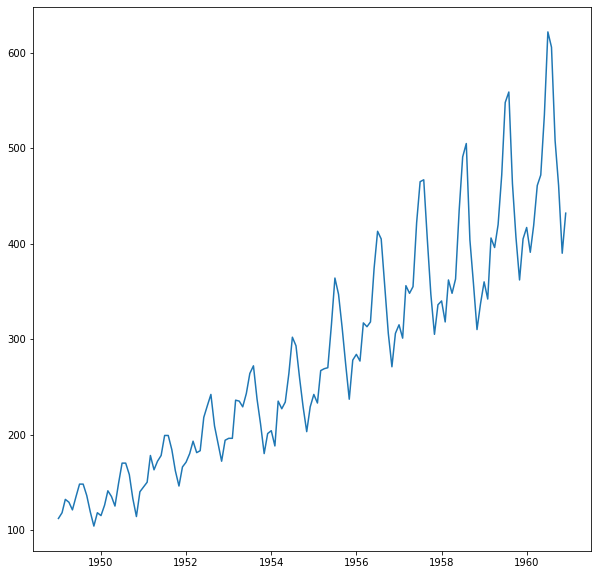

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.plot(ts)


In [31]:
from statsmodels.tsa.stattools import adfuller





In [32]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
   # rolmean = pd.rolling_mean(timeseries, window=12)

    #rolstd = pd.rolling_std(timeseries, window=12)

    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    
    
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:') 
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

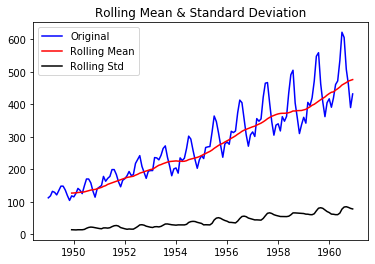

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
test_stationarity(ts)


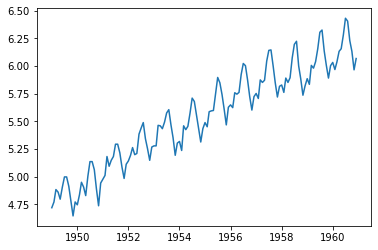

In [34]:
ts_log = np.log(ts)
plt.plot(ts_log)

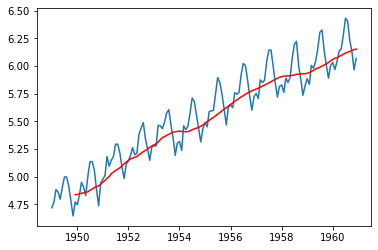

In [35]:
#moving_avg = pd.rolling_mean(ts_log,12)
moving_avg = pd.Series(ts_log).rolling(window=12).mean()



plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [36]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

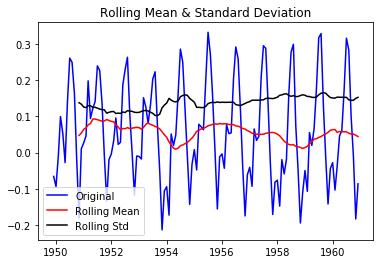

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [38]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

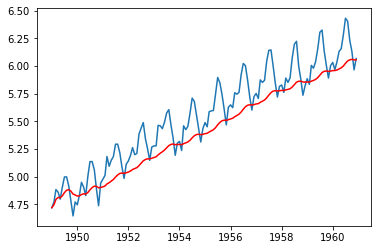

In [39]:
#expwighted_avg = pd.ewma(ts_log, halflife=12)
expwighted_avg = ts_log.ewm( halflife=12).mean()

## ??df_test_ewma = df_test.ewm(span=2).mean()


plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

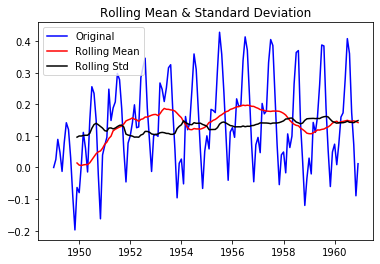

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [40]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

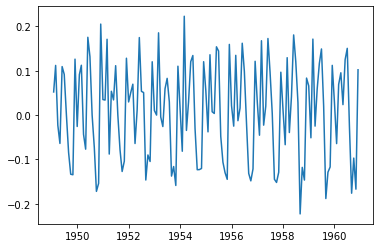

In [41]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

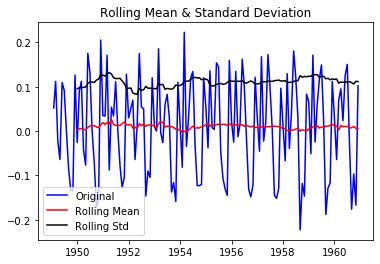

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [42]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose



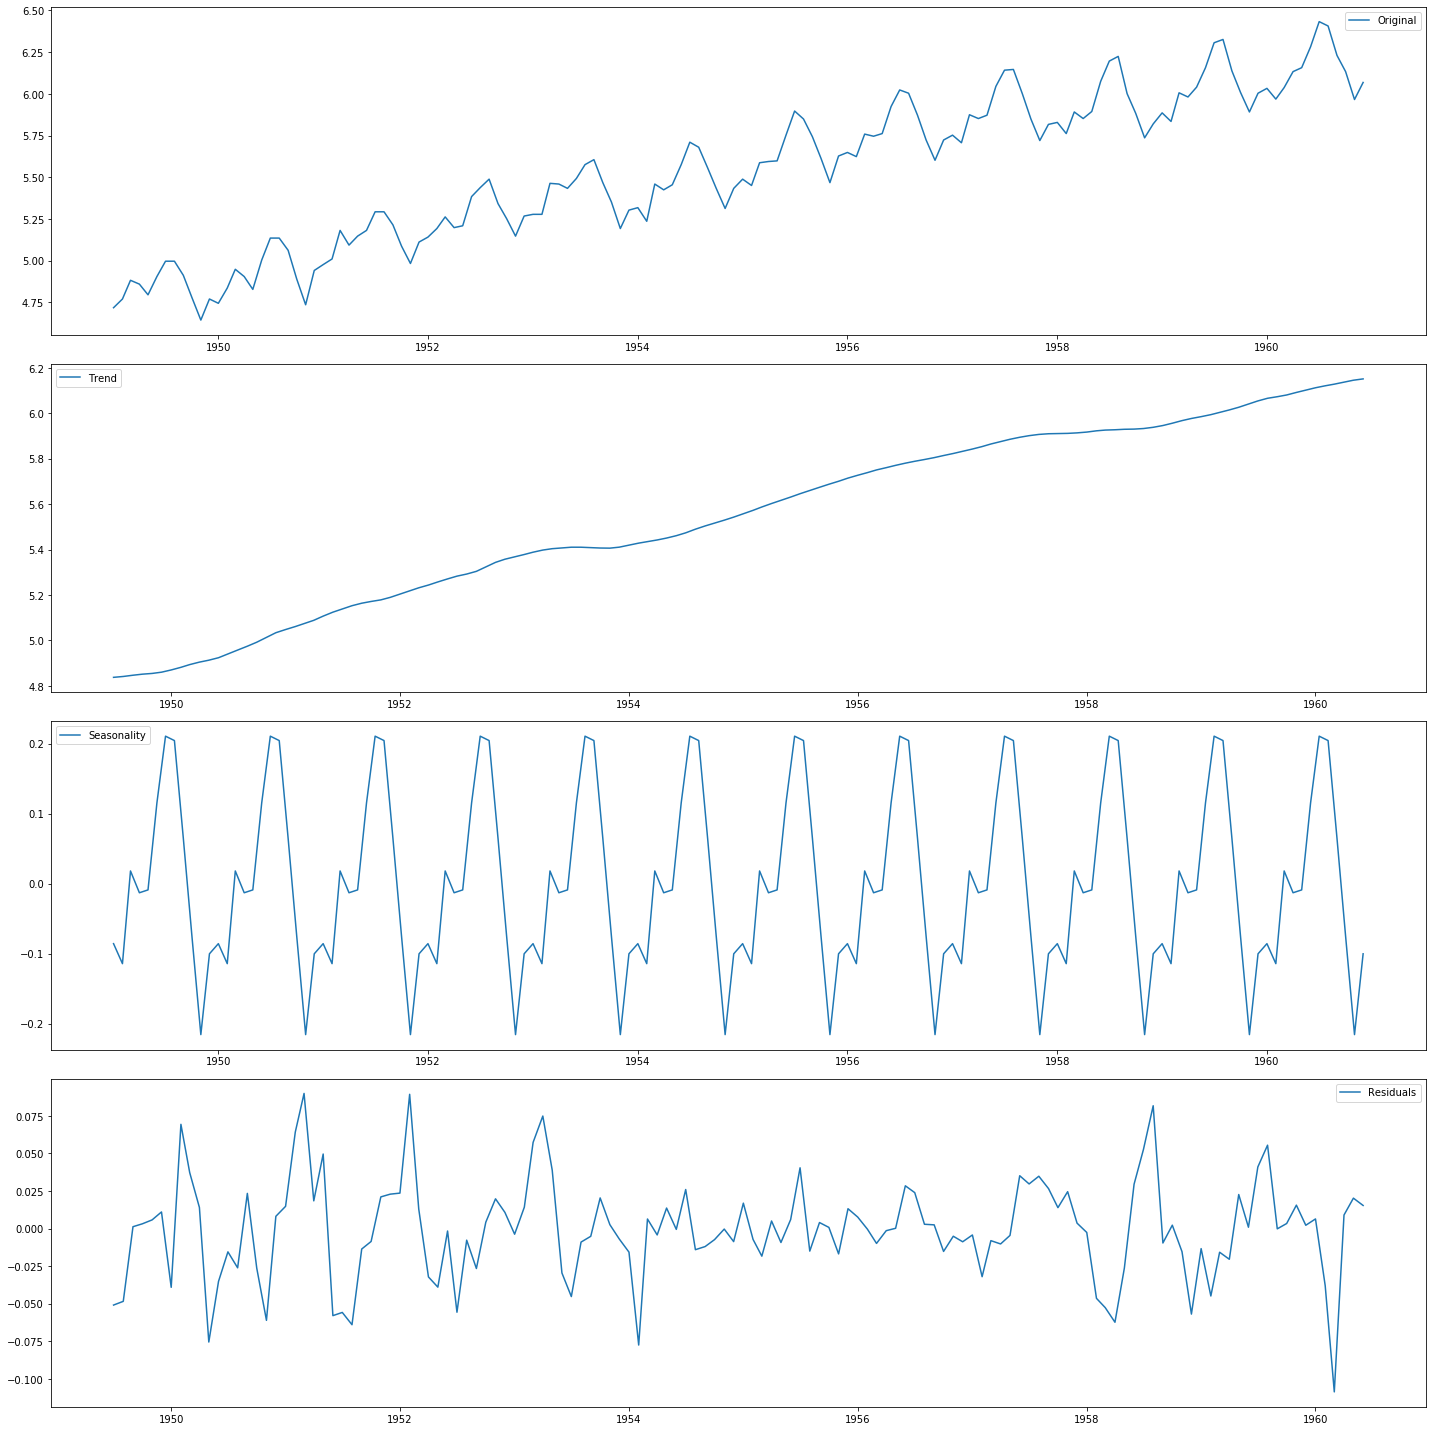

In [44]:
plt.figure(figsize=(20,20))
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

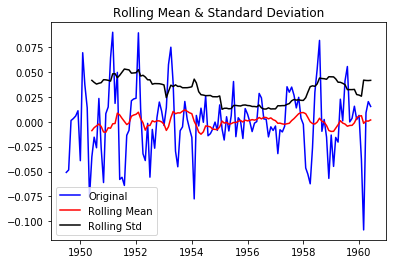

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [45]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [46]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

In [47]:
lag_acf = acf(ts_log_diff, nlags=20)

lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


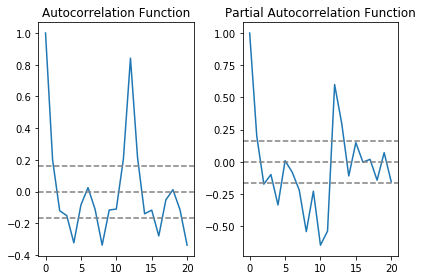

In [48]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [50]:
from statsmodels.tsa.arima_model import ARMA, ARIMA
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

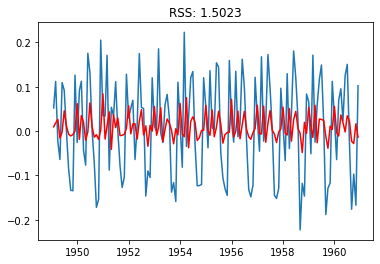

In [76]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit()  





plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [77]:
model = ARMA(ts_log, order=(2, 0)) 


results_AR = model.fit()  


results_AR.fittedvalues


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Month
1949-01-01    5.504986
1949-02-01    4.737219
1949-03-01    4.803655
1949-04-01    4.925839
1949-05-01    4.873471
                ...   
1960-08-01    6.439450
1960-09-01    6.374843
1960-10-01    6.170143
1960-11-01    6.093523
1960-12-01    5.915533
Length: 144, dtype: float64

In [78]:
data

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

In [79]:

train_ERROR = ts_log - results_AR.fittedvalues #--->>>> ACC/RMSE

train_ERROR


Month
1949-01-01   -0.786487
1949-02-01    0.033466
1949-03-01    0.079147
1949-04-01   -0.066026
1949-05-01   -0.077681
                ...   
1960-08-01   -0.032570
1960-09-01   -0.144362
1960-10-01   -0.036745
1960-11-01   -0.127377
1960-12-01    0.152892
Length: 144, dtype: float64

In [80]:
#future prediction

predictions = results_AR.predict(start=144, end=700)

predictions

1961-01-01    6.074778
1961-02-01    6.059613
1961-03-01    6.040103
1961-04-01    6.020195
1961-05-01    6.000777
                ...   
2007-01-01    5.504986
2007-02-01    5.504986
2007-03-01    5.504986
2007-04-01    5.504986
2007-05-01    5.504986
Freq: MS, Length: 557, dtype: float64

In [83]:
#reversing log transformation

prediction_values = np.exp(results_AR.predict(start=143, end=200))

prediction_values.head()

1960-12-01    370.751968
1961-01-01    434.753178
1961-02-01    428.209705
1961-03-01    419.936412
1961-04-01    411.658881
Freq: MS, dtype: float64

Text(0.5, 1.0, 'RSS: nan')

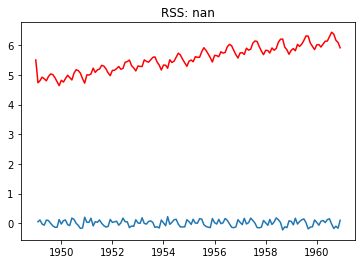

In [84]:


plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


In [87]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

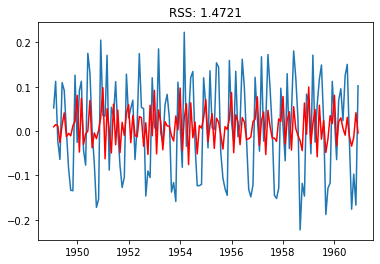

In [89]:
  
plt.plot(ts_log_diff)

plt.plot(results_MA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [90]:
##p d q values are 2 1 2

model = ARIMA(ts_log, order=(2, 1, 2))  


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [91]:



results_ARIMA = model.fit()  

Text(0.5, 1.0, 'RSS: 1.0292')

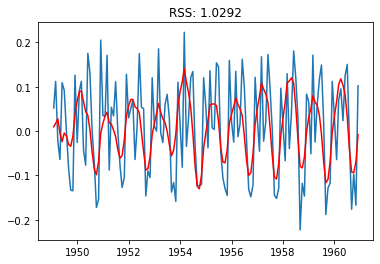

In [92]:



plt.plot(ts_log_diff)

plt.plot(results_ARIMA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [93]:
results_ARIMA.fittedvalues



Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64

In [94]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)


In [95]:
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [96]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()




predictions_ARIMA_diff_cumsum.head()



Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [97]:
#building the model

from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(train)

###stepwise 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [100]:
train

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

In [102]:
### train data last date - 1960-12-01

dti = pd.date_range('1961-01-01', periods=50, freq='MS')
## MS means monthly or monthly start

dti


DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [104]:
forecast = model.predict(n_periods=50)


forecast = pd.DataFrame(forecast,index = dti,columns=['Prediction'])
forecast.head()

Prediction
1961-01-01  467.573743
1961-02-01  490.494463
1961-03-01  509.136849
1961-04-01  492.554700
1961-05-01  495.305958

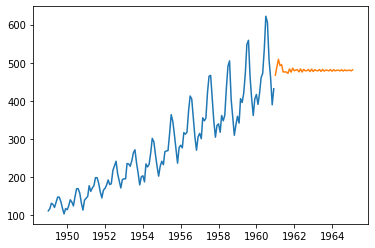

In [108]:

#plot the predictions for validation set
plt.plot(train["#Passengers"], label='Train')

#plt.plot(valid, label='Valid')

plt.plot(forecast, label='Prediction')


plt.show()